In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import hyperspy

In [2]:
#import hyperspy.api as hs

In [4]:
import matplotlib
matplotlib.rcParams["backend"] = "Qt4Agg"

In [5]:
from traits.etsconfig.api import ETSConfig
ETSConfig.toolkit = 'qt4'
%matplotlib notebook
import hyperspy.api as hs

/opt/anaconda3/envs/hsenv2/lib/python3.7/site-packages/pyUSID/viz/__init__.py:18: FutureWarning: Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. pyUSID.plot_utils will be removed in a future release of pyUSID
  FutureWarning)


In [6]:
#import matplotlib
#matplotlib.rcParams["backend"] = "QtAgg"
#import hyperspy.api as hs

In [66]:
#matplotlib.use('WXAgg',warn=False, force=True)
#from matplotlib import pyplot as plt
#print "Switched to:",matplotlib.get_backend()

Switched to: Qt4Agg


/opt/anaconda3/envs/hsenv2/lib/python3.7/importlib/__init__.py:127: MatplotlibDeprecationWarning: 
The matplotlib.backends.backend_qt4agg backend was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  return _bootstrap._gcd_import(name[level:], package, level)


In [4]:
#from traits.etsconfig.api import ETSConfig
#ETSConfig.toolkit = 'qt4'
#import matplotlib
#gui_env = ['TKAgg','GTKAgg','Qt4Agg','WXAgg']
#for gui in gui_env:
#    try:
#        print ("testing", gui)
#        matplotlib.use(gui,warn=False, force=True)
#        from matplotlib import pyplot as plt
#        break
#    except:
#        continue
#print ("Using:",matplotlib.get_backend())

testing TKAgg
testing GTKAgg
testing Qt4Agg
testing WXAgg
Using: Qt4Agg


In [5]:
#from traits.etsconfig.api import ETSConfig
#ETSConfig.toolkit = 'qt4'
#import matplotlib
#gui_env = ['TKAgg','GTKAgg','Qt4Agg','WXAgg']
#for gui in gui_env:
#    try:
#        print ("testing", gui)
#        matplotlib.use(gui,warn=False, force=True)
#        from matplotlib import pyplot as plt
#        break
#    except:
#        continue
#print ("Using:",matplotlib.get_backend())

testing TKAgg
testing GTKAgg
testing Qt4Agg
testing WXAgg
Using: Qt4Agg


In [70]:
data_14 = np.load("sample_data_14.npy")
#s = hs.load("sample_data_14.txt")
#s = hs.load()
s = hs.signals.Signal1D(data_14[:,1])

In [98]:
N_ZLP = 1324992/0.025012626262626257

In [99]:
energy_data = data_14[:,0]
s.axes_manager[0].scale = np.diff(energy_data).mean()
s.axes_manager[0].units = 'keV'
s.axes_manager[0].offset = energy_data[0]
s.axes_manager[0].name = 'Energy'
s.axes_manager

Signal axis name,size,offset,scale,units
Energy,1981,-4.002020202020201,0.025012626262626257,keV


In [100]:
s.set_signal_type('EELS')
s.set_microscope_parameters(beam_energy=200, collection_angle=30)
eps, out = s.kramers_kronig_analysis(zlp = N_ZLP, n = 3, full_output = True)

{'thickness': <BaseSignal, title:  thickness (calculated using Kramers-Kronig analysis), dimensions: (|1)>}


<IPython.core.display.Javascript object>


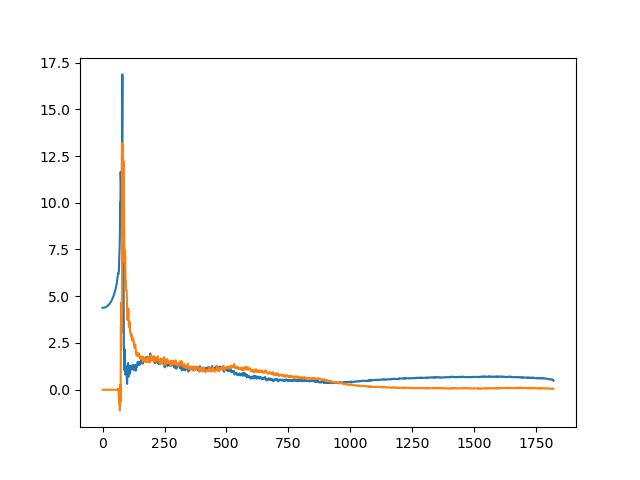

In [101]:
print(out)
plt.figure()
plt.plot( np.real(eps))
plt.plot( np.imag(eps))

<IPython.core.display.Javascript object>


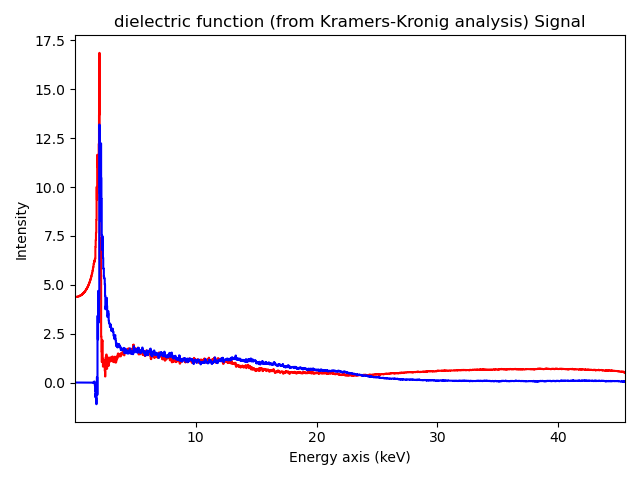

In [102]:
eps.plot()

In [103]:
out['thickness'].data

array([16.87974764])

In [11]:
im = hs.load("area03-eels-SI-aligned.dm4")
im

<EELSSpectrum, title: EELS Spectrum Image (aligned), dimensions: (128, 94|1981)>

In [8]:
im.metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Detector
│       │   └── EELS
│       │       ├── aperture_size = 5.0
│       │       ├── collection_angle = 100.0
│       │       ├── dwell_time = 0.001
│       │       ├── frame_number = 1
│       │       └── spectrometer = GIF Quantum ER
│       ├── Stage
│       │   ├── tilt_alpha = -0.03157038986682892
│       │   ├── tilt_beta = 2.3084075450897217
│       │   ├── x = 0.131679984375
│       │   ├── y = -0.153286109375
│       │   └── z = 0.0217229140625
│       ├── acquisition_mode = STEM
│       ├── beam_current = 0.0
│       ├── beam_energy = 60.0
│       ├── camera_length = 25.0
│       ├── convergence_angle = 0.0
│       ├── magnification = 400000.0
│       └── microscope = JEOL COM
├── General
│   ├── date = 2019-07-11
│   ├── original_filename = area03-eels-SI-aligned.dm4
│   ├── time = 20:00:52
│   └── title = EELS Spectrum Image (aligned)
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain_factor = 1.0
    │       └── gain_offset = 0.0
    ├── binned = True
    ├── quantity = Intensity (Counts)
    └── signal_type = EELS

<IPython.core.display.Javascript object>


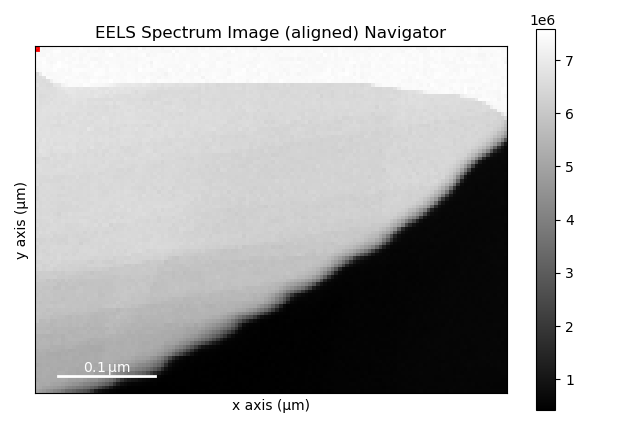

<IPython.core.display.Javascript object>


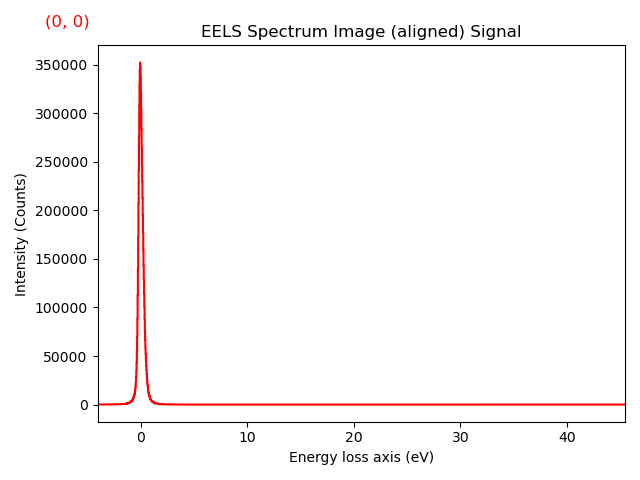

In [9]:
im.plot()

In [10]:
eps, outs = im.kramers_kronig_analysis(zlp=1E8, n = 3, full_output = True)

<IPython.core.display.Javascript object>


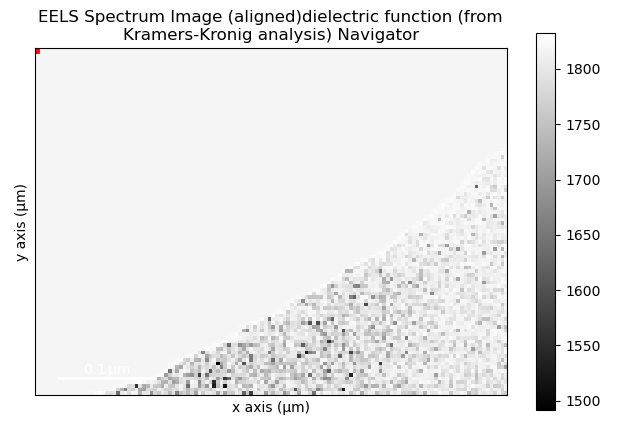

<IPython.core.display.Javascript object>


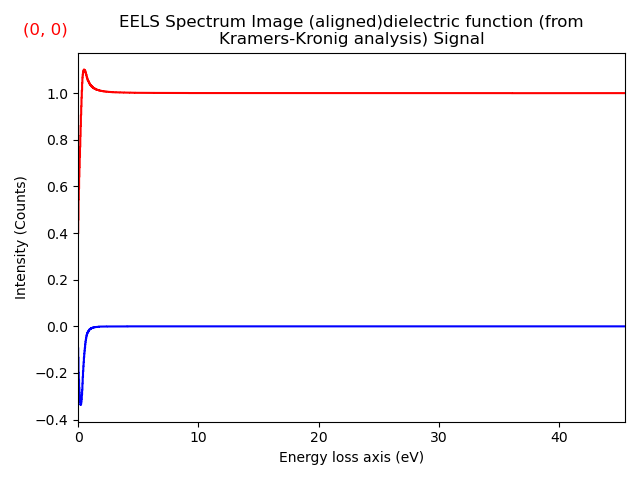

In [11]:
eps.plot()

In [12]:
zlps = np.ones((128,94)) * 1E9
zlps[:60,:] = 1E8

In [13]:
im.get_dimensions_from_data

<bound method BaseSignal.get_dimensions_from_data of <EELSSpectrum, title: EELS Spectrum Image (aligned), dimensions: (128, 94|1981)>>

In [45]:
eps2, out2 = im.kramers_kronig_analysis(zlp = zlps, n= 3, full_output = True)

ValueError: The zero-loss peak input is not valid, it must be                             in the BaseSignal class or a Number.

In [46]:
th = im.estimate_thickness(threshold=3.0)

ValueError: Function <bound method BaseSignal.update_plot of <BaseSignal, title: EELS Spectrum Image (aligned) $\frac{t}{\lambda}$, dimensions: (128, 94|)>> already connected to <hyperspy.events.Event: Event that triggers when the data has changed: {<bound method BaseSignal.update_plot of <BaseSignal, title: EELS Spectrum Image (aligned) $\frac{t}{\lambda}$, dimensions: (128, 94|)>>}>.

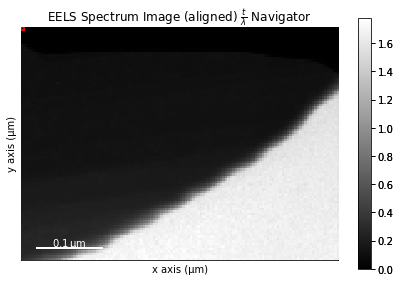

In [48]:
th.plot()

In [15]:
im_r = im.remove_background(signal_range= (-.0, 1.5))

<IPython.core.display.Javascript object>


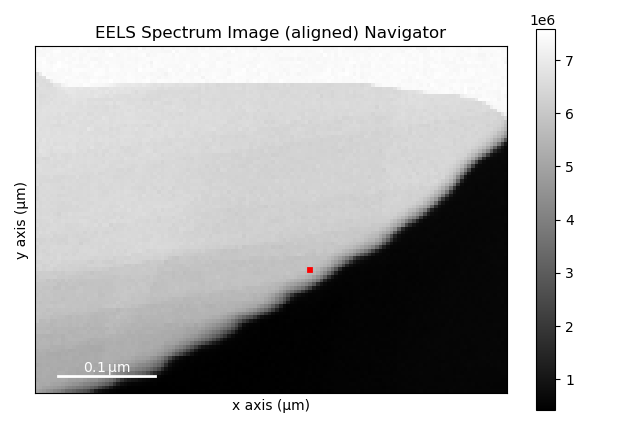

<IPython.core.display.Javascript object>


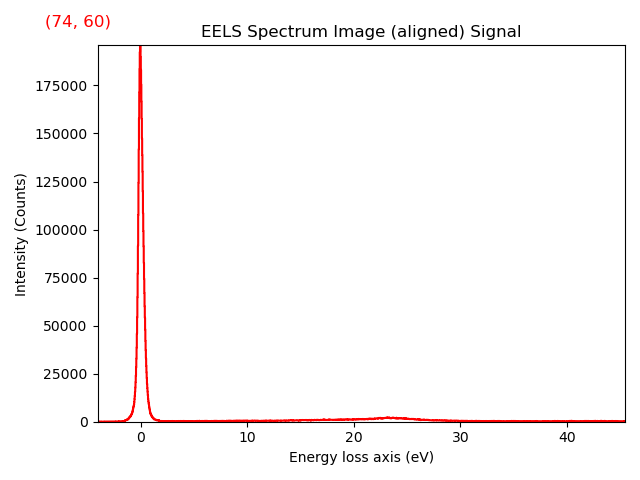

In [16]:
im_r.plot()

In [25]:
im.isig[1]

<BaseSignal, title: EELS Spectrum Image (aligned), dimensions: (128, 94|)>

In [40]:
im.axes_manager.signal_axes[0].axis

array([-4.05411345, -4.02911345, -4.00411345, ..., 45.39588729,
       45.42088729, 45.44588729])

In [39]:
im.isig[300]

<BaseSignal, title: EELS Spectrum Image (aligned), dimensions: (128, 94|)>

In [42]:
axis = im.axes_manager.signal_axes[0]
slicer = im.axes_manager._get_data_slice(
        [(axis.index_in_array, slice(None, axis.size)), ])

In [58]:
im.data[-1,-1,-1]

336.93777

In [61]:
axis.axis **2

array([  16.43583585,   16.23375518,   16.0329245 , ..., 2060.7865827 ,
       2063.0570021 , 2065.3286715 ])

In [59]:
((im.data[slicer]*-1)==im.data*-1).all()

True